In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import umap
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.cluster as cluster
from scipy.spatial.distance import cdist
import os
import math
import itertools

# For one image

In [563]:
# import image
# NOTE: images are not resized because low quality pictures
# should be underrepresented in the data
im = Image.open('.../Caracal_caracal/original.png')
im

In [564]:
# set pixel values and get length and width
pix = im.load()
length, width = im.size

In [565]:
# pull rgb values from every pixel with a transparency > 50% 
r = []
g = []
b = []
for i in range(length):
    for j in range(width):
        m, n, o, p = pix[i,j]
        if p > 127.5:
            r.append(m)
            g.append(n)
            b.append(o)
rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})
rgb

,R,G,B
0,166,122,97
1,161,116,96
2,154,110,88
3,144,99,79
4,137,94,77
...,...,...,...
1189,153,117,93
1190,142,109,83
1191,145,115,88
1192,150,114,93


In [517]:
# get umap ready and run (no need to scale because the scales are the same)
reducer = umap.UMAP()
embedding = reducer.fit_transform(rgb)
embedding.shape

(336, 2)

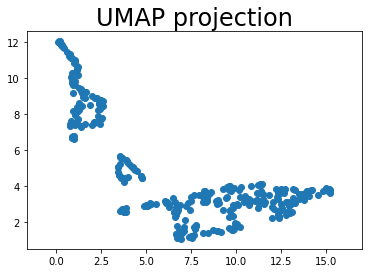

In [518]:
# plot umap results
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)
plt.show()

In [519]:
# use k means clustering
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(embedding)
    kmeanModel.fit(embedding)
  
    distortions.append(sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / embedding.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / embedding.shape[0]
    mapping2[k] = kmeanModel.inertia_

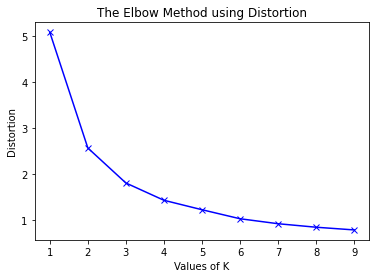

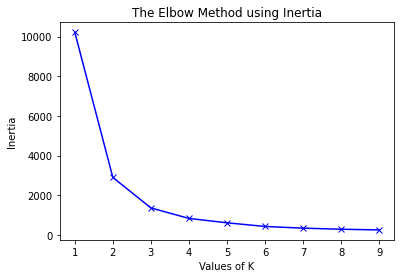

In [520]:
# make k means elbow plot using inertia and distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Cluster Number: 3


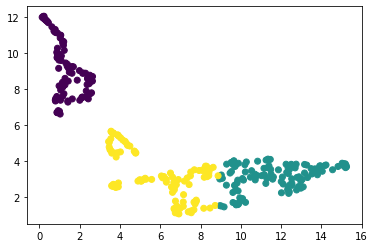

In [521]:
# use k means cluster number to cluster
clus = input("Cluster Number: ")
kmeans_labels = cluster.KMeans(n_clusters=int(clus)).fit_predict(embedding)
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels)
plt.show()

In [522]:
# add cluster identity and separate 
rgb['cluster'] = kmeans_labels
clus0 = rgb.loc[rgb['cluster'] == 0]
clus1 = rgb.loc[rgb['cluster'] == 1]
clus2 = rgb.loc[rgb['cluster'] == 2]

In [523]:
# average the r, g, and b values
r_avg0 = round(np.mean(clus0['R']))
g_avg0 = round(np.mean(clus0['G']))
b_avg0 = round(np.mean(clus0['B']))
r_avg1 = round(np.mean(clus1['R']))
g_avg1 = round(np.mean(clus1['G']))
b_avg1 = round(np.mean(clus1['B']))
r_avg2 = round(np.mean(clus2['R']))
g_avg2 = round(np.mean(clus2['G']))
b_avg2 = round(np.mean(clus2['B']))
print("Cluster 0: (" + str(r_avg0) + "," + str(g_avg0) + "," + str(b_avg0) + ").")
print("Cluster 1: (" + str(r_avg1) + "," + str(g_avg1) + "," + str(b_avg1) + ").")
print("Cluster 2: (" + str(r_avg2) + "," + str(g_avg2) + "," + str(b_avg2) + ").")


Cluster 0: (81,65,53).
Cluster 1: (52,39,30).
Cluster 2: (66,52,43).


# For multiple images

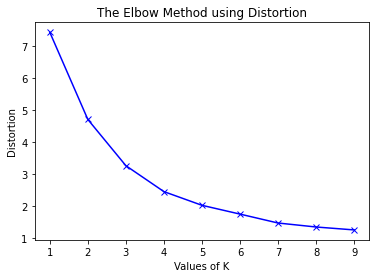

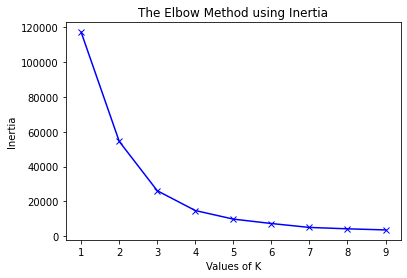

Cluster Number: 3


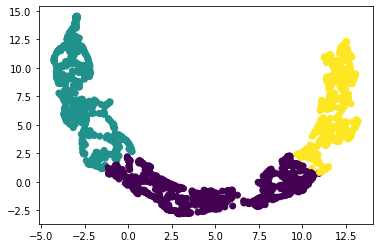

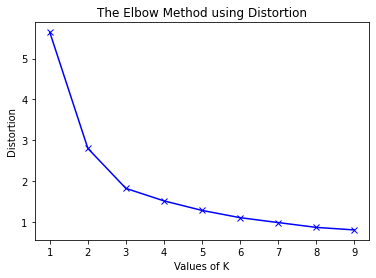

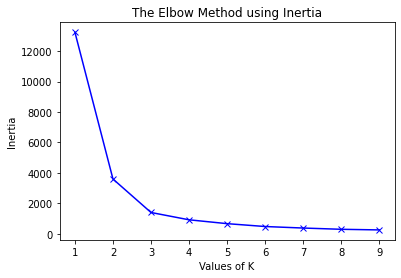

Cluster Number: 2


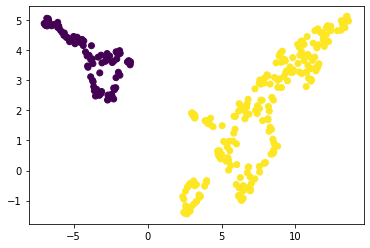

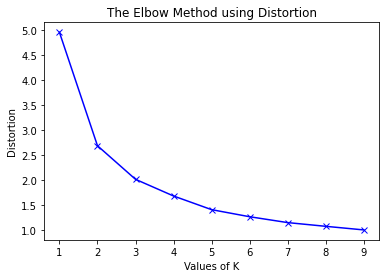

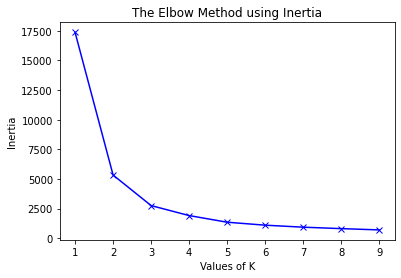

Cluster Number: 3


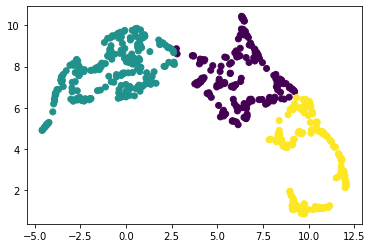

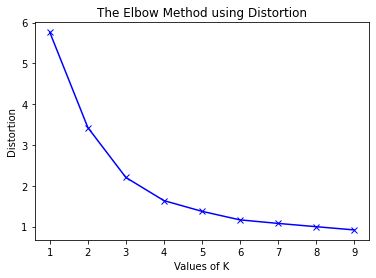

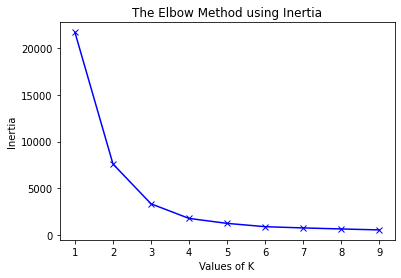

Cluster Number: 3


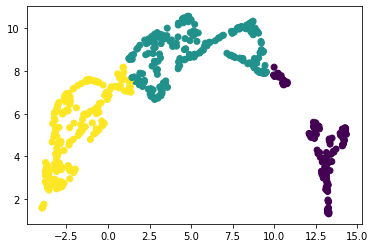

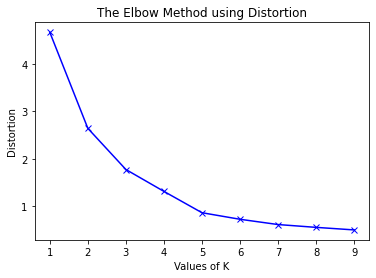

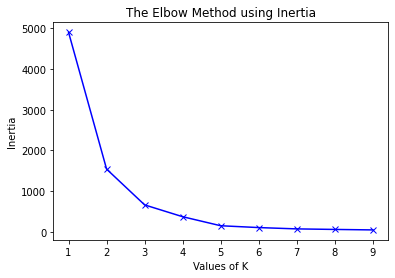

Cluster Number: 3


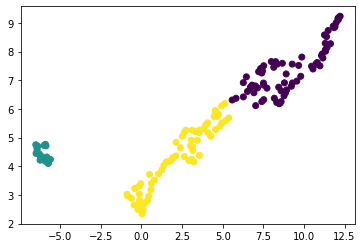

In [444]:
# all together, start by designating folder
og_folder = '.../Leopardus_jacobita/'
folder = sorted(os.listdir(og_folder))
if '.DS_Store' in folder:
        folder.remove('.DS_Store')
        
clus_num = []        
for count, filename in enumerate(folder):
    # import image
    im = Image.open(og_folder + filename)
    
    # set pixel values and get length and width
    pix = im.load()
    length, width = im.size
    
    # pull rgb values from every pixel with a transparency > 50% 
    r = []
    g = []
    b = []
    for i in range(length):
        for j in range(width):
            m, n, o, p = pix[i,j]
            if p > 127.5:
                r.append(m)
                g.append(n)
                b.append(o)
    rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})
    
    # get umap ready and run (no need to scale because the scales are the same)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(rgb)
    
    # use k means clustering
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(1, 10)

    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(embedding)
        kmeanModel.fit(embedding)

        distortions.append(sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / embedding.shape[0])
        inertias.append(kmeanModel.inertia_)

        mapping1[k] = sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                       'euclidean'), axis=1)) / embedding.shape[0]
        mapping2[k] = kmeanModel.inertia_
        
    # make k means elbow plot using inertia and distortion
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()


    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()
    
    # use k means cluster number to cluster
    clus = input("Cluster Number: ")
    kmeans_labels = cluster.KMeans(n_clusters=int(clus)).fit_predict(embedding)
    plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels)
    plt.show()
    
    clus_num.append(int(clus))
    
# average the cluster numbers found for the individuals
clus_fin = round(np.mean(clus_num))


In [480]:
# redo stuff with the final cluster count (i.e. the number of colors in the eye)
for q, filename in enumerate(folder):
    # import image
    im = Image.open(og_folder + filename)

    # set pixel values and get length and width
    pix = im.load()
    length, width = im.size

    # pull rgb values from every pixel with a transparency > 50% 
    r = []
    g = []
    b = []
    for i in range(length):
        for j in range(width):
            m, n, o, p = pix[i,j]
            if p > 127.5:
                r.append(m)
                g.append(n)
                b.append(o)
    rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})

    # get umap ready and run (no need to scale because the scales are the same)
    reducer = umap.UMAP()
    embedding = reducer.fit_transform(rgb)

    # use final cluster number to cluster
    kmeans_labels = cluster.KMeans(n_clusters=int(clus_fin)).fit_predict(embedding)
    
    #add cluster identity and separate 
    rgb['cluster'] = kmeans_labels
    
    for w in range(clus_fin):
        exec('clus'+str(w)+'_'+str(q) + ' = rgb.loc[rgb["cluster"] ==' +
             str(w)+ ']')

        # average the r, g, and b values
        exec('r_avg_clus' +str(w)+'_file'+str(q) + '= round(np.mean(clus'+str(w)+'_'+str(q) + '["R"]))')
        exec('g_avg_clus' +str(w)+'_file'+str(q) + '= round(np.mean(clus'+str(w)+'_'+str(q) + '["G"]))')
        exec('b_avg_clus' +str(w)+'_file'+str(q) + '= round(np.mean(clus'+str(w)+'_'+str(q) + '["B"]))')
        

In [481]:
# figure out which clusters are closest to which others and combine all the data
q = 0
for e in range(len(folder)-1):
    x = []
    y = []
    for i in range(clus_fin):
        x.append(i)
        y.append((i+1)*100)

    test = [i for i in itertools.product(x,y, repeat = len(x)) if len(set(i)) == 2*len(x)]
    test = pd.DataFrame(test)
    for i in range(len(x)):
        test = test.drop(test[test.iloc[:,i*2] != x[i]].index)
    test = test.reset_index(drop=True)


    for m in range(len(test)):
        wagny = []
        for n in range(int(int(len(test.iloc[0]))/2)):
            # calculate all cluster differences by RGB average
            exec('wagny.append(math.sqrt((r_avg_clus' +str(test.iloc[m][n*2])+'_file'+str(q)+ \
            '-r_avg_clus' +str(int(float(str(((test.iloc[m][n*2+1])/100)-1))))+'_file'+str(e+1)+ \
             ')**2+(g_avg_clus' +str(test.iloc[m][n*2])+'_file'+str(q)+ \
             '-g_avg_clus' +str(int(float(str(((test.iloc[m][n*2+1])/100)-1))))+'_file'+str(e+1)+ \
             ')**2+(b_avg_clus' +str(test.iloc[m][n*2])+'_file'+str(q)+ \
             '-b_avg_clus' +str(int(float(str(((test.iloc[m][n*2+1])/100)-1))))+'_file'+str(e+1)+')**2))')

    minpos = wagny.index(min(wagny))
    clus_combo = test.iloc[minpos]

    for i in range(int(int(len(clus_combo))/2)):
        exec('temp = [clus'+str(clus_combo[i*2])+'_'+str(q)+',clus'\
             +str(int(float(str(((clus_combo[i*2+1])/100)-1))))+'_'+str(e+1)+']')
        exec('clus'+str(clus_combo[i*2])+'_'+str(q)+'= pd.concat(temp).reset_index(drop=True)')

        # re-average the r, g, and b values
        exec('r_avg_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= round(np.mean(clus'+str(clus_combo[i*2])+'_'+str(q) + '["R"]))')
        exec('g_avg_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= round(np.mean(clus'+str(clus_combo[i*2])+'_'+str(q) + '["G"]))')
        exec('b_avg_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= round(np.mean(clus'+str(clus_combo[i*2])+'_'+str(q) + '["B"]))')
        
        # get stdev values for r, g, and b
        exec('r_stdev_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= np.std(clus'+str(clus_combo[i*2])+'_'+str(q) + '["R"])')
        exec('g_stdev_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= np.std(clus'+str(clus_combo[i*2])+'_'+str(q) + '["G"])')
        exec('b_stdev_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= np.std(clus'+str(clus_combo[i*2])+'_'+str(q) + '["B"])')
        

In [482]:
# figure out which cluster is primary, secondary, etc. and save averages
sizes = []
final_data = []
final_data.append(clus_fin)
final_data_stdevs = []
for i in range(clus_fin):
    exec('sizes.append(len(clus'+str(i)+'_'+str(q) +'))')
sizes = pd.DataFrame(sizes)

for i in range(clus_fin):    
    maxpos = sizes.idxmax()
    exec('final_data.append(r_avg_clus'+str(int(maxpos))+'_file'+str(q) +')')
    exec('final_data.append(g_avg_clus'+str(int(maxpos))+'_file'+str(q) +')')
    exec('final_data.append(b_avg_clus'+str(int(maxpos))+'_file'+str(q) +')')
    exec('final_data_stdevs.append(r_stdev_clus'+str(int(maxpos))+'_file'+str(q) +')')
    exec('final_data_stdevs.append(g_stdev_clus'+str(int(maxpos))+'_file'+str(q) +')')
    exec('final_data_stdevs.append(b_stdev_clus'+str(int(maxpos))+'_file'+str(q) +')')
    sizes = sizes.drop([int(maxpos)])
    
final_data
# output is number of clusters, avg primary R, avg primary G, avg primary B, avg secondary R, avg secondary G, etc.
# final_data_stdevs output is number of clusters, stdev primary R, stdev primary G, stdev primary B,
# stdev secondary R, stdev secondary G, etc.

[3, 127, 104, 73, 104, 85, 62, 133, 111, 80]

# Run for different eye types, not all together

### Old code for automatically assigning clusters

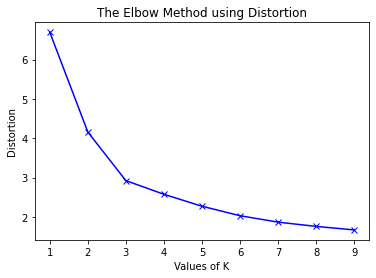

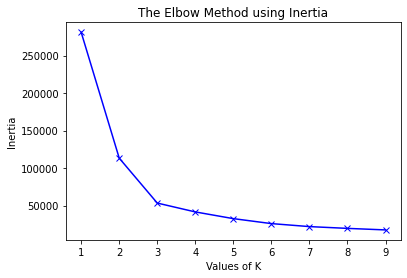

Cluster Number: 3


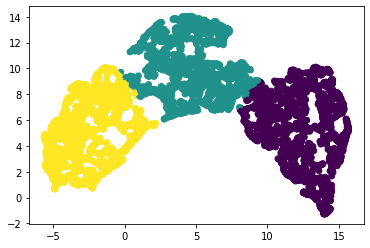

[3, 178, 139, 101, 155, 114, 83, 129, 88, 62]

In [544]:
# all together, start by designating folder
og_folder = '.../Leopardus_jacobita/'
folder = sorted(os.listdir(og_folder))
if '.DS_Store' in folder:
        folder.remove('.DS_Store')

# do the whole pipeline but merge all the data at the start at once
r = []
g = []
b = []
for count, filename in enumerate(folder):
    # import image
    im = Image.open(og_folder + filename)
    
    # set pixel values and get length and width
    pix = im.load()
    length, width = im.size
    
    # pull rgb values from every pixel with a transparency > 50% 
    
    for i in range(length):
        for j in range(width):
            m, n, o, p = pix[i,j]
            if p > 127.5:
                r.append(m)
                g.append(n)
                b.append(o)
                
rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})
    
# get umap ready and run (no need to scale because the scales are the same)
reducer = umap.UMAP()
embedding = reducer.fit_transform(rgb)

# use k means clustering
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(embedding)
    kmeanModel.fit(embedding)

    distortions.append(sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / embedding.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / embedding.shape[0]
    mapping2[k] = kmeanModel.inertia_

# make k means elbow plot using inertia and distortion
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# use k means cluster number to cluster
clus = input("Cluster Number: ")
kmeans_labels = cluster.KMeans(n_clusters=int(clus)).fit_predict(embedding)
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels)
plt.show()

clus_num_big = int(clus)

#add cluster identity and separate 
rgb['cluster'] = kmeans_labels

for w in range(clus_num_big):
        exec('clus'+str(w)+ ' = rgb.loc[rgb["cluster"] ==' +
             str(w)+ ']')

        # average the r, g, and b values
        exec('r_avg_clus' +str(w) + '= round(np.mean(clus'+str(w)+ '["R"]))')
        exec('g_avg_clus' +str(w) + '= round(np.mean(clus'+str(w)+ '["G"]))')
        exec('b_avg_clus' +str(w) + '= round(np.mean(clus'+str(w)+ '["B"]))')
    
# figure out which cluster is primary, secondary, etc. and save averages
sizes = []
final_data_big = []
final_data_big.append(clus_num_big)
for i in range(clus_num_big):
    exec('sizes.append(len(clus'+str(i)+'))')
sizes = pd.DataFrame(sizes)

for i in range(clus_num_big):    
    maxpos = sizes.idxmax()
    exec('final_data_big.append(r_avg_clus'+str(int(maxpos))+')')
    exec('final_data_big.append(g_avg_clus'+str(int(maxpos))+')')
    exec('final_data_big.append(b_avg_clus'+str(int(maxpos))+')')
    sizes = sizes.drop([int(maxpos)])
    
final_data_big
# output is number of clusters for species eye color, avg primary R, avg primary G, avg primary B,
# secondary R, secondary G, etc.

# these are the eye types

In [495]:
eye_types = []
for count, filename in enumerate(folder):
    # import image
    im = Image.open(og_folder + filename)
   
    # set pixel values and get length and width
    pix = im.load()
    length, width = im.size

    # pull rgb values from every pixel with a transparency > 50% 
    r = []
    g = []
    b = []
    for i in range(length):
        for j in range(width):
            m, n, o, p = pix[i,j]
            if p > 127.5:
                r.append(m)
                g.append(n)
                b.append(o)
    rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})
    file_r = round(np.mean(rgb['R']))
    file_g = round(np.mean(rgb['G']))
    file_b = round(np.mean(rgb['B']))

    # calculate which of the eye types the specific eye is closest to
    results = []
    for i in range(final_data_big[0]):
        dist = math.sqrt((file_r-final_data_big[3*i+1])**2+(file_g-final_data_big[3*i+2])**2+(file_b-final_data_big[3*i+3])**2)
        results.append(dist)

    mindist = results.index(min(results))
    eye_types.append(mindist)

data_tuples = list(zip(folder,eye_types))
types_list = pd.DataFrame(data_tuples,columns=['Filename','Type'])
types_list


,Filename,Type
0,383072.png,1
1,6a-cat-768x478.png,0
2,Andean-mountain-cat.png,2
3,andean-cat-in-sanctuary-scaled.png,2
4,andean-mountain-cat-X.png,0


### New Pipeline assigning colors manually

In [1164]:
# convert rgb values to hexcodes
def rgb_to_hex(rgb):
        return '%02x%02x%02x' % rgb

In [1165]:
# all together, start by designating folder
og_folder = ".../Lynx_pardinus/'
folder = sorted(os.listdir(og_folder))
if '.DS_Store' in folder:
        folder.remove('.DS_Store')
        
eye_types = []
for count, filename in enumerate(folder):
    
    # import image
    im = Image.open(og_folder + filename)
    
    # set pixel values and get length and width
    pix = im.load()
    length, width = im.size
    
    # pull rgb values from every pixel with a transparency > 50% 
    r = []
    g = []
    b = []
    for i in range(length):
        for j in range(width):
            m, n, o, p = pix[i,j]
            if p > 127.5:
                r.append(m)
                g.append(n)
                b.append(o)
    rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})
    
    # output hexcode
    print(rgb_to_hex((round(np.mean(rgb["R"])), round(np.mean(rgb["G"])), round(np.mean(rgb["B"])))))
    print(filename)
    # input which of the eye types the specific eye is closest to
    col = input("Number: ")
    eye_types.append(col)

data_tuples = list(zip(folder,eye_types))
types_list = pd.DataFrame(data_tuples,columns=['Filename','Type'])
final_data_big = [types_list.Type.unique().size]
types_list['Type'] = types_list['Type'].astype('int')
types_list

5a5639
5y8o2q58ts_200763.png
Number: 0
716049
Cris-CantónGetty-copy-fbc59b8.png
Number: 1
878470
Lince_ibérico_(Lynx_pardinus),_Almuradiel,_Ciudad_Real,_España,_2021-12-19,_DD_07.png
Number: 0
b38c52
Screenshot 2022-11-29 at 6.17.40 PM.png
Number: 2
666252
_84478244_lynxindex.png
Number: 1
807a54
h_56733953.png
Number: 0
9a9f8d
iber-lynx751.png
Number: 3
a0904b
iberian_lynx_jcobo107618_352246.png
Number: 2


,Filename,Type
0,5y8o2q58ts_200763.png,0
1,Cris-CantónGetty-copy-fbc59b8.png,1
2,"Lince_ibérico_(Lynx_pardinus),_Almuradiel,_Ci...",0
3,Screenshot 2022-11-29 at 6.17.40 PM.png,2
4,_84478244_lynxindex.png,1
5,h_56733953.png,0
6,iber-lynx751.png,3
7,iberian_lynx_jcobo107618_352246.png,2


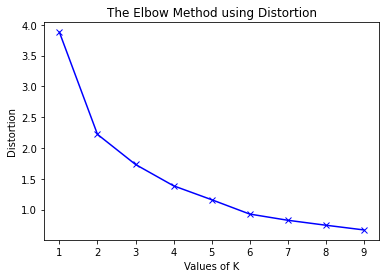

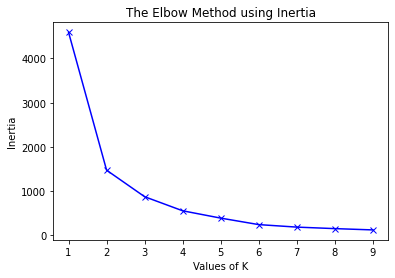

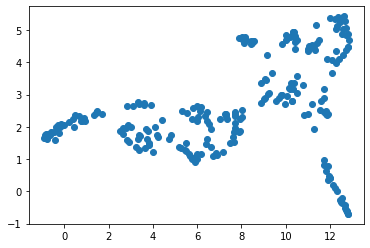

Cluster Number: 2


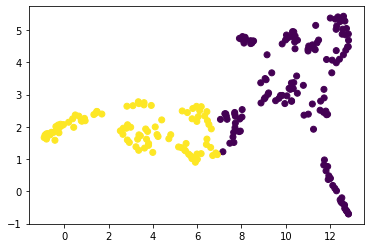

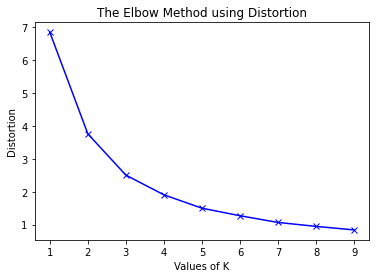

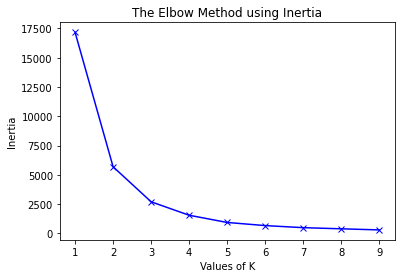

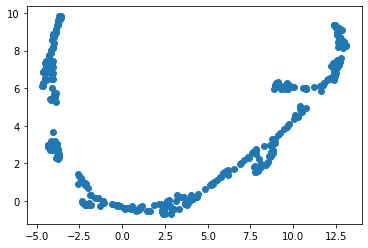

Cluster Number: 3


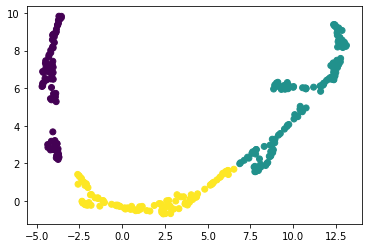

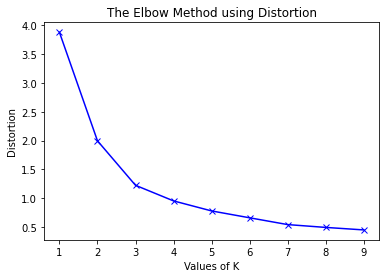

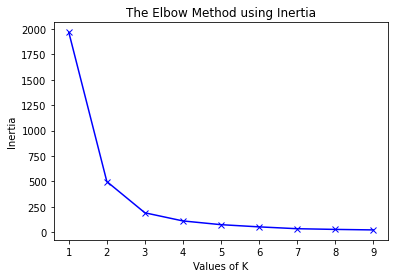

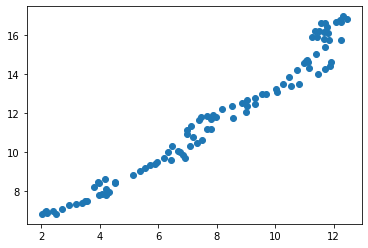

Cluster Number: 3


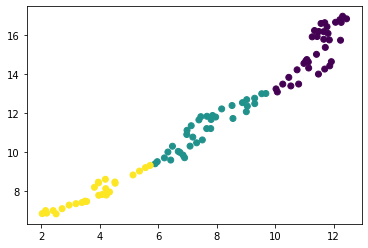

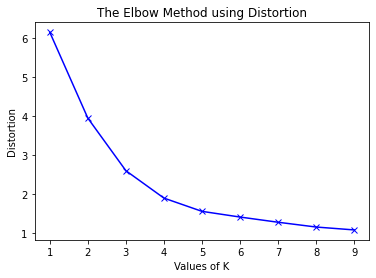

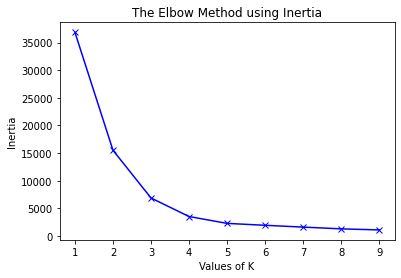

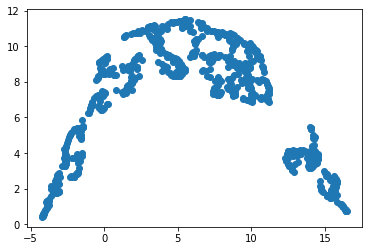

Cluster Number: 3


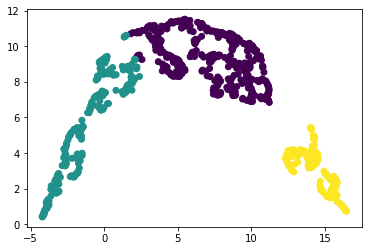

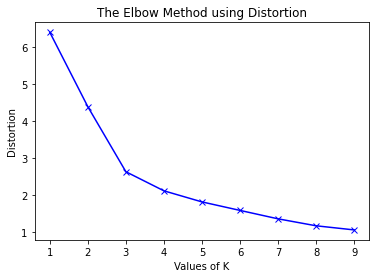

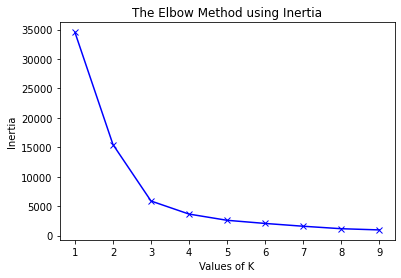

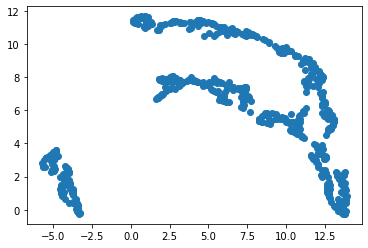

Cluster Number: 3


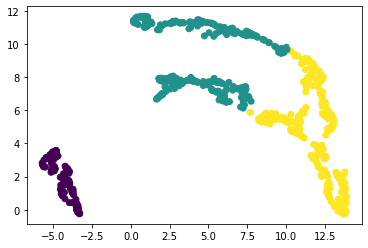

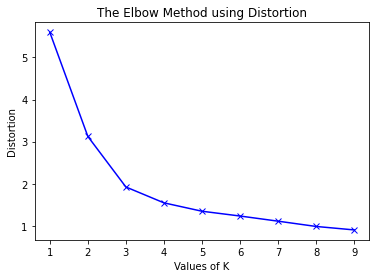

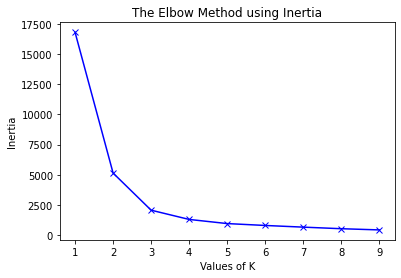

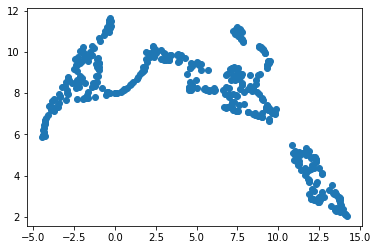

Cluster Number: 3


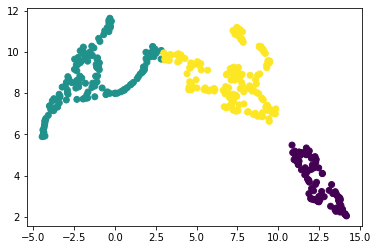

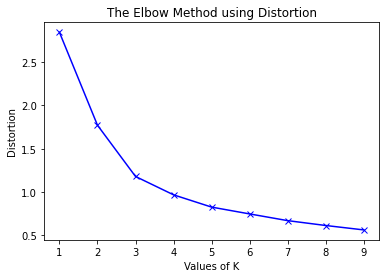

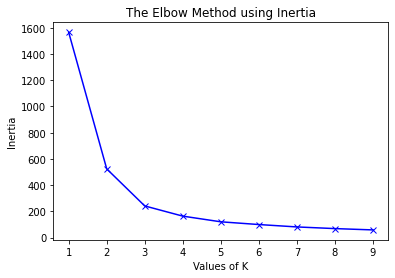

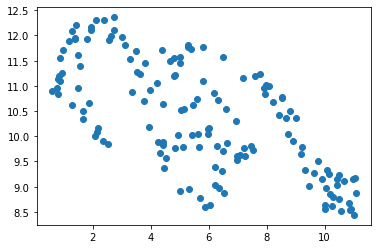

Cluster Number: 3


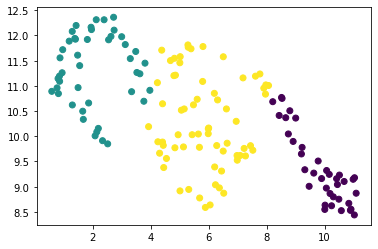

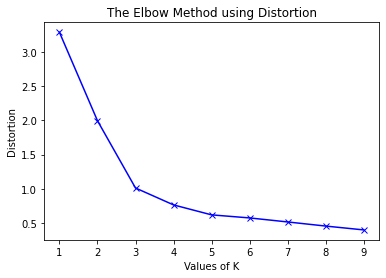

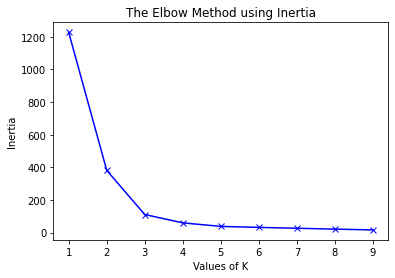

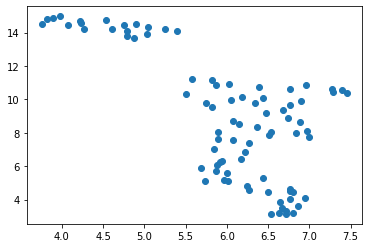

Cluster Number: 3


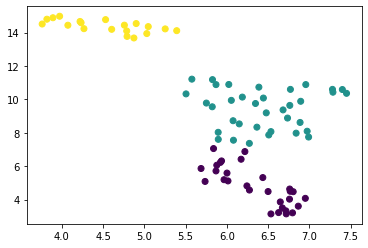

One eye


[4,
 3,
 107,
 104,
 80,
 124,
 120,
 92,
 127,
 122,
 97,
 3,
 123,
 110,
 90,
 94,
 84,
 64,
 104,
 93,
 73,
 3,
 158,
 126,
 65,
 179,
 143,
 81,
 193,
 163,
 105,
 3,
 153,
 158,
 140,
 168,
 172,
 156,
 135,
 141,
 122]

In [1166]:
# run the whole pipeline for each eye type
overall_frame = []
overall_frame.append(final_data_big[0])
for z in range(final_data_big[0]):
    type_temp = types_list.loc[types_list['Type'] == z, 'Filename'].values.tolist()

    clus_num = []        
    for count, filename in enumerate(type_temp):
        # import image
        im = Image.open(og_folder + filename)

        # set pixel values and get length and width
        pix = im.load()
        length, width = im.size

        # pull rgb values from every pixel with a transparency > 50% 
        r = []
        g = []
        b = []
        for i in range(length):
            for j in range(width):
                m, n, o, p = pix[i,j]
                if p > 127.5:
                    r.append(m)
                    g.append(n)
                    b.append(o)
        rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})

        # get umap ready and run (no need to scale because the scales are the same)
        reducer = umap.UMAP()
        embedding = reducer.fit_transform(rgb)

        # use k means clustering
        distortions = []
        inertias = []
        mapping1 = {}
        mapping2 = {}
        K = range(1, 10)

        for k in K:
            # Building and fitting the model
            kmeanModel = KMeans(n_clusters=k).fit(embedding)
            kmeanModel.fit(embedding)

            distortions.append(sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                                'euclidean'), axis=1)) / embedding.shape[0])
            inertias.append(kmeanModel.inertia_)

            mapping1[k] = sum(np.min(cdist(embedding, kmeanModel.cluster_centers_,
                                           'euclidean'), axis=1)) / embedding.shape[0]
            mapping2[k] = kmeanModel.inertia_

        # make k means elbow plot using inertia and distortion
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('Values of K')
        plt.ylabel('Distortion')
        plt.title('The Elbow Method using Distortion')
        plt.show()


        plt.plot(K, inertias, 'bx-')
        plt.xlabel('Values of K')
        plt.ylabel('Inertia')
        plt.title('The Elbow Method using Inertia')
        plt.show()

        # use k means cluster number to cluster
        plt.scatter(embedding[:, 0], embedding[:, 1])
        plt.show()
        clus = input("Cluster Number: ")
        kmeans_labels = cluster.KMeans(n_clusters=int(clus)).fit_predict(embedding)
        plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels)
        plt.show()

        clus_num.append(int(clus))

    # average the cluster numbers found for the individuals, adding 0.000001 so it rounds up if there is 0.5
    clus_fin = round(np.mean(clus_num)+0.00000000001)

    # redo stuff with the final cluster count (i.e. the number of colors in the eye)
    for q, filename in enumerate(type_temp):
        # import image
        im = Image.open(og_folder + filename)

        # set pixel values and get length and width
        pix = im.load()
        length, width = im.size

        # pull rgb values from every pixel with a transparency > 50% 
        r = []
        g = []
        b = []
        for i in range(length):
            for j in range(width):
                m, n, o, p = pix[i,j]
                if p > 127.5:
                    r.append(m)
                    g.append(n)
                    b.append(o)
        rgb = pd.DataFrame({'R':r, 'G':g, 'B':b})

        # get umap ready and run (no need to scale because the scales are the same)
        reducer = umap.UMAP()
        embedding = reducer.fit_transform(rgb)

        # use final cluster number to cluster
        kmeans_labels = cluster.KMeans(n_clusters=int(clus_fin)).fit_predict(embedding)

        #add cluster identity and separate 
        rgb['cluster'] = kmeans_labels

        for w in range(clus_fin):
            exec('clus'+str(w)+'_'+str(q) + ' = rgb.loc[rgb["cluster"] ==' +
                 str(w)+ ']')

            # average the r, g, and b values
            exec('r_avg_clus' +str(w)+'_file'+str(q) + '= round(np.mean(clus'+str(w)+'_'+str(q) + '["R"]))')
            exec('g_avg_clus' +str(w)+'_file'+str(q) + '= round(np.mean(clus'+str(w)+'_'+str(q) + '["G"]))')
            exec('b_avg_clus' +str(w)+'_file'+str(q) + '= round(np.mean(clus'+str(w)+'_'+str(q) + '["B"]))')
            
            
    # figure out which clusters are closest to which others and combine all the data
    if len(type_temp)-1 > 0:
        q = 0
        for e in range(len(type_temp)-1):
            x = []
            y = []
            for i in range(clus_fin):
                x.append(i)
                y.append((i+1)*100)

            test = [i for i in itertools.product(x,y, repeat = len(x)) if len(set(i)) == 2*len(x)]
            test = pd.DataFrame(test)
            for i in range(len(x)):
                test = test.drop(test[test.iloc[:,i*2] != x[i]].index)
            test = test.reset_index(drop=True)


            for m in range(len(test)):
                wagny = []
                for n in range(int(int(len(test.iloc[0]))/2)):
                    # calculate all cluster differences by RGB average
                    exec('wagny.append(math.sqrt((r_avg_clus' +str(test.iloc[m][n*2])+'_file'+str(q)+ \
                    '-r_avg_clus' +str(int(float(str(((test.iloc[m][n*2+1])/100)-1))))+'_file'+str(e+1)+ \
                     ')**2+(g_avg_clus' +str(test.iloc[m][n*2])+'_file'+str(q)+ \
                     '-g_avg_clus' +str(int(float(str(((test.iloc[m][n*2+1])/100)-1))))+'_file'+str(e+1)+ \
                     ')**2+(b_avg_clus' +str(test.iloc[m][n*2])+'_file'+str(q)+ \
                     '-b_avg_clus' +str(int(float(str(((test.iloc[m][n*2+1])/100)-1))))+'_file'+str(e+1)+')**2))')

            minpos = wagny.index(min(wagny))
            clus_combo = test.iloc[minpos]

            for i in range(int(int(len(clus_combo))/2)):
                exec('temp = [clus'+str(clus_combo[i*2])+'_'+str(q)+',clus'\
                     +str(int(float(str(((clus_combo[i*2+1])/100)-1))))+'_'+str(e+1)+']')
                exec('clus'+str(clus_combo[i*2])+'_'+str(q)+'= pd.concat(temp).reset_index(drop=True)')

                # re-average the r, g, and b values
                exec('r_avg_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= round(np.mean(clus'+str(clus_combo[i*2])+'_'+str(q) + '["R"]))')
                exec('g_avg_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= round(np.mean(clus'+str(clus_combo[i*2])+'_'+str(q) + '["G"]))')
                exec('b_avg_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= round(np.mean(clus'+str(clus_combo[i*2])+'_'+str(q) + '["B"]))')

                # get stdev values for r, g, and b
                exec('r_stdev_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= np.std(clus'+str(clus_combo[i*2])+'_'+str(q) + '["R"])')
                exec('g_stdev_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= np.std(clus'+str(clus_combo[i*2])+'_'+str(q) + '["G"])')
                exec('b_stdev_clus' +str(clus_combo[i*2])+'_file'+str(q) + '= np.std(clus'+str(clus_combo[i*2])+'_'+str(q) + '["B"])')

    else:
        print('One eye')
        
    # figure out which cluster is primary, secondary, etc. and save averages
    sizes = []
    overall_frame.append(clus_fin)
    final_data_stdevs = []
    for i in range(clus_fin):
        exec('sizes.append(len(clus'+str(i)+'_'+str(q) +'))')
    sizes = pd.DataFrame(sizes)

    for i in range(clus_fin):    
        maxpos = sizes.idxmax()
        exec('overall_frame.append(r_avg_clus'+str(int(maxpos))+'_file'+str(q) +')')
        exec('overall_frame.append(g_avg_clus'+str(int(maxpos))+'_file'+str(q) +')')
        exec('overall_frame.append(b_avg_clus'+str(int(maxpos))+'_file'+str(q) +')')
        exec('final_data_stdevs.append(r_stdev_clus'+str(int(maxpos))+'_file'+str(q) +')')
        exec('final_data_stdevs.append(g_stdev_clus'+str(int(maxpos))+'_file'+str(q) +')')
        exec('final_data_stdevs.append(b_stdev_clus'+str(int(maxpos))+'_file'+str(q) +')')
        sizes = sizes.drop([int(maxpos)])

overall_frame
# output is number of eye types, number of clusters in type 0, avg primary R of type 0, avg primary G of type 0,
# avg primary B of type 0, avg secondary R of type 0, avg secondary G of type 0, etc.

In [1169]:
tems = pd.DataFrame(overall_frame)
pd.set_option('display.max_columns', 100)
tems.T
tems.T.to_clipboard(header=False,index=False)
tems.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,4,3,107,104,80,124,120,92,127,122,97,3,123,110,90,94,84,64,104,93,73,3,158,126,65,179,143,81,193,163,105,3,153,158,140,168,172,156,135,141,122


# Cleaning up data based on dark, medium, and light

In [1188]:
# read in data
brown_data = pd.read_csv('.../general_data_grey_only.csv')
brown_data


,Rename,gray_col_num,gray_pri_R,gray_pri_G,gray_pri_B,gray_sec_R,gray_sec_G,gray_sec_B,gray_ter_R,gray_ter_G,gray_ter_B,gray_qua_R,gray_qua_G,gray_qua_B
0,Panthera_tigris_tigris_corbetti,3.0,98.0,80.0,51.0,105.0,85.0,54.0,167.0,145.0,104.0,NaN,NaN,NaN
1,Panthera_tigris_tigris_tigris,3.0,154.0,133.0,88.0,123.0,107.0,71.0,96.0,82.0,54.0,NaN,NaN,NaN
2,Panthera_tigris_tigris_altaica,3.0,82.0,67.0,49.0,106.0,92.0,75.0,99.0,84.0,66.0,NaN,NaN,NaN
3,Panthera_tigris_sondaica,2.0,140.0,139.0,125.0,85.0,84.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Panthera_tigris_tigris_amoyensis,3.0,88.0,75.0,68.0,131.0,114.0,104.0,108.0,91.0,81.0,NaN,NaN,NaN
5,Panthera_tigris_tigris_jacksoni,3.0,132.0,130.0,123.0,183.0,181.0,167.0,130.0,122.0,109.0,NaN,NaN,NaN
6,Panthera_uncia,1.0,86.0,76.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Panthera_pardus_orientalis,3.0,82.0,81.0,79.0,117.0,116.0,109.0,56.0,54.0,54.0,NaN,NaN,NaN
8,Panthera_pardus_tulliana,2.0,126.0,113.0,75.0,133.0,119.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Panthera_pardus_fusca,3.0,131.0,118.0,93.0,159.0,142.0,112.0,146.0,132.0,98.0,NaN,NaN,NaN


In [1189]:
# sort the tri-color eyes and assign them to dark, med, and light
darkR = []
darkG = []
darkB = []
medR = []
medG = []
medB = []
lightR = []
lightG = []
lightB = []
name = []
order = []
col_num = []

for i in range(len(brown_data)):
    # find distance from black (0,0,0)
    temp_order = []
    if brown_data.iloc[i,1] == 3:  
        col_num.append(3)
        name.append(brown_data.iloc[i,0])
        dist0 = math.sqrt((0-brown_data.iloc[i,2])**2+(0-brown_data.iloc[i,3])**2+(0-brown_data.iloc[i,4])**2)
        dist1 = math.sqrt((0-brown_data.iloc[i,5])**2+(0-brown_data.iloc[i,6])**2+(0-brown_data.iloc[i,7])**2)
        dist2 = math.sqrt((0-brown_data.iloc[i,8])**2+(0-brown_data.iloc[i,9])**2+(0-brown_data.iloc[i,10])**2)
        distances = pd.DataFrame([dist0,dist1,dist2])
        maxpos = distances.idxmax()
        lightR.append(brown_data.iloc[i,int(maxpos)*3+2])
        lightG.append(brown_data.iloc[i,int(maxpos)*3+3])
        lightB.append(brown_data.iloc[i,int(maxpos)*3+4])
        temp_order.append(int(maxpos))
        
        distances = distances.drop([int(maxpos)])
        maxpos = distances.idxmax()
        medR.append(brown_data.iloc[i,int(maxpos)*3+2])
        medG.append(brown_data.iloc[i,int(maxpos)*3+3])
        medB.append(brown_data.iloc[i,int(maxpos)*3+4])
        temp_order.append(int(maxpos))
        
        distances = distances.drop([int(maxpos)])
        maxpos = distances.idxmax()
        darkR.append(brown_data.iloc[i,int(maxpos)*3+2])
        darkG.append(brown_data.iloc[i,int(maxpos)*3+3])
        darkB.append(brown_data.iloc[i,int(maxpos)*3+4])
        temp_order.append(int(maxpos))
        
        if temp_order[0] == 0:
            if temp_order[1] == 1:
                order.append("lmd")
            if temp_order[1] == 2:
                order.append("ldm")
        if temp_order[0] == 1:
            if temp_order[1] == 0:
                order.append("mld")
            if temp_order[1] == 2:
                order.append("dlm")
        if temp_order[0] == 2:
            if temp_order[1] == 0:
                order.append("mdl")
            if temp_order[1] == 1:
                order.append("dml")

datafor3 = pd.DataFrame({'Rename':name, 'col_num':col_num,'order':order,
                        'lightR':lightR,'lightG':lightG,'lightB':lightB,
                        'medR':medR,'medG':medG,'medB':medB,
                        'darkR':darkR,'darkG':darkG,'darkB':darkB})       
datafor3
        

,Rename,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB
0,Panthera_tigris_tigris_corbetti,3,dml,167.0,145.0,104.0,105.0,85.0,54.0,98.0,80.0,51.0
1,Panthera_tigris_tigris_tigris,3,lmd,154.0,133.0,88.0,123.0,107.0,71.0,96.0,82.0,54.0
2,Panthera_tigris_tigris_altaica,3,dlm,106.0,92.0,75.0,99.0,84.0,66.0,82.0,67.0,49.0
3,Panthera_tigris_tigris_amoyensis,3,dlm,131.0,114.0,104.0,108.0,91.0,81.0,88.0,75.0,68.0
4,Panthera_tigris_tigris_jacksoni,3,mld,183.0,181.0,167.0,132.0,130.0,123.0,130.0,122.0,109.0
5,Panthera_pardus_orientalis,3,mld,117.0,116.0,109.0,82.0,81.0,79.0,56.0,54.0,54.0
6,Panthera_pardus_fusca,3,dlm,159.0,142.0,112.0,146.0,132.0,98.0,131.0,118.0,93.0
7,Neofelis_nebulosa,3,mdl,82.0,78.0,77.0,67.0,64.0,64.0,49.0,48.0,47.0
8,Felis_lybica_cafra,3,lmd,184.0,182.0,167.0,161.0,160.0,146.0,136.0,135.0,128.0
9,Felis_lybica_lybica,3,lmd,188.0,185.0,168.0,176.0,175.0,158.0,162.0,160.0,146.0


In [1190]:
# sort the bi-colored eyes
# averages of three categories
darkRavg = np.mean(darkR)
darkGavg = np.mean(darkG)
darkBavg = np.mean(darkB)
medRavg = np.mean(medR)
medGavg = np.mean(medG)
medBavg = np.mean(medB)
lightRavg = np.mean(lightR)
lightGavg = np.mean(lightG)
lightBavg = np.mean(lightB)

darkR = []
darkG = []
darkB = []
medR = []
medG = []
medB = []
lightR = []
lightG = []
lightB = []
name = []
order = []
col_num = []

for i in range(len(brown_data)):
    temp_order = []
    if brown_data.iloc[i,1] == 2:
        name.append(brown_data.iloc[i,0])
        col_num.append(2)
        col1_dist2 = math.sqrt((darkRavg-brown_data.iloc[i,2])**2+(darkGavg-brown_data.iloc[i,3])**2+(darkBavg-brown_data.iloc[i,4])**2)
        col1_dist1 = math.sqrt((medRavg-brown_data.iloc[i,2])**2+(medGavg-brown_data.iloc[i,3])**2+(medBavg-brown_data.iloc[i,4])**2)
        col1_dist0 = math.sqrt((lightRavg-brown_data.iloc[i,2])**2+(lightGavg-brown_data.iloc[i,3])**2+(lightBavg-brown_data.iloc[i,4])**2)
        col2_dist2 = math.sqrt((darkRavg-brown_data.iloc[i,5])**2+(darkGavg-brown_data.iloc[i,6])**2+(darkBavg-brown_data.iloc[i,7])**2)
        col2_dist1 = math.sqrt((medRavg-brown_data.iloc[i,5])**2+(medGavg-brown_data.iloc[i,6])**2+(medBavg-brown_data.iloc[i,7])**2)
        col2_dist0 = math.sqrt((lightRavg-brown_data.iloc[i,5])**2+(lightGavg-brown_data.iloc[i,6])**2+(lightBavg-brown_data.iloc[i,7])**2)
        
        
        sum_distances = pd.DataFrame([col1_dist0+col2_dist1,
                                      col1_dist0+col1_dist2,
                                      col1_dist1+col2_dist0,
                                      col1_dist1+col2_dist2,
                                      col1_dist2+col2_dist0,
                                      col1_dist2+col2_dist1])
        minpos = sum_distances.idxmin()
        
        if int(minpos) == 0:
            order.append("lm")
            lightR.append(brown_data.iloc[i,2])
            lightG.append(brown_data.iloc[i,3])
            lightB.append(brown_data.iloc[i,4])
            medR.append(brown_data.iloc[i,5])
            medG.append(brown_data.iloc[i,6])
            medB.append(brown_data.iloc[i,7])
            darkR.append(brown_data.iloc[i,5])
            darkG.append(brown_data.iloc[i,6])
            darkB.append(brown_data.iloc[i,7])
        if int(minpos) == 1:
            order.append("ld")
            lightR.append(brown_data.iloc[i,2])
            lightG.append(brown_data.iloc[i,3])
            lightB.append(brown_data.iloc[i,4])
            darkR.append(brown_data.iloc[i,5])
            darkG.append(brown_data.iloc[i,6])
            darkB.append(brown_data.iloc[i,7])
            medR.append((brown_data.iloc[i,2]+brown_data.iloc[i,5])/2)
            medG.append((brown_data.iloc[i,3]+brown_data.iloc[i,6])/2)
            medB.append((brown_data.iloc[i,4]+brown_data.iloc[i,7])/2)
        if int(minpos) == 2:
            order.append("ml")
            medR.append(brown_data.iloc[i,2])
            medG.append(brown_data.iloc[i,3])
            medB.append(brown_data.iloc[i,4])
            lightR.append(brown_data.iloc[i,5])
            lightG.append(brown_data.iloc[i,6])
            lightB.append(brown_data.iloc[i,7])
            darkR.append(brown_data.iloc[i,2])
            darkG.append(brown_data.iloc[i,3])
            darkB.append(brown_data.iloc[i,4])
        if int(minpos) == 3:
            order.append("md")
            medR.append(brown_data.iloc[i,2])
            medG.append(brown_data.iloc[i,3])
            medB.append(brown_data.iloc[i,4])
            darkR.append(brown_data.iloc[i,5])
            darkG.append(brown_data.iloc[i,6])
            darkB.append(brown_data.iloc[i,7])
            lightR.append(brown_data.iloc[i,2])
            lightG.append(brown_data.iloc[i,3])
            lightB.append(brown_data.iloc[i,4])
        if int(minpos) == 4:
            order.append("dl")
            darkR.append(brown_data.iloc[i,2])
            darkG.append(brown_data.iloc[i,3])
            darkB.append(brown_data.iloc[i,4])
            lightR.append(brown_data.iloc[i,5])
            lightG.append(brown_data.iloc[i,6])
            lightB.append(brown_data.iloc[i,7])
            medR.append((brown_data.iloc[i,2]+brown_data.iloc[i,5])/2)
            medG.append((brown_data.iloc[i,3]+brown_data.iloc[i,6])/2)
            medB.append((brown_data.iloc[i,4]+brown_data.iloc[i,7])/2)
        if int(minpos) == 5:
            order.append("dm")
            darkR.append(brown_data.iloc[i,2])
            darkG.append(brown_data.iloc[i,3])
            darkB.append(brown_data.iloc[i,4])
            medR.append(brown_data.iloc[i,5])
            medG.append(brown_data.iloc[i,6])
            medB.append(brown_data.iloc[i,7])
            lightR.append(brown_data.iloc[i,5])
            lightG.append(brown_data.iloc[i,6])
            lightB.append(brown_data.iloc[i,7])
            
datafor2 = pd.DataFrame({'Rename':name, 'col_num':col_num,'order':order,
                        'lightR':lightR,'lightG':lightG,'lightB':lightB,
                        'medR':medR,'medG':medG,'medB':medB,
                        'darkR':darkR,'darkG':darkG,'darkB':darkB}) 
datafor2

,Rename,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB
0,Panthera_tigris_sondaica,2,md,140.0,139.0,125.0,140.0,139.0,125.0,85.0,84.0,81.0
1,Panthera_pardus_tulliana,2,dm,133.0,119.0,88.0,133.0,119.0,88.0,126.0,113.0,75.0
2,Panthera_leo_persica,2,dl,154.0,145.0,130.0,127.5,118.0,103.5,101.0,91.0,77.0
3,Neofelis_diardi,2,md,134.0,127.0,91.0,134.0,127.0,91.0,97.0,87.0,53.0
4,Felis_lybica_ornata,2,ml,225.0,212.0,183.0,208.0,196.0,165.0,208.0,196.0,165.0
5,Felis_bieti,2,ld,157.0,151.0,149.0,173.5,166.5,164.5,190.0,182.0,180.0
6,Felis_silvestris,2,lm,124.0,126.0,113.0,110.0,119.0,106.0,110.0,119.0,106.0
7,Felis_chaus_chaus,2,lm,148.0,146.0,136.0,126.0,121.0,110.0,126.0,121.0,110.0
8,Prionailurus_rubiginosus,2,md,105.0,115.0,119.0,105.0,115.0,119.0,78.0,85.0,84.0
9,Lynx_lynx,2,lm,183.0,165.0,143.0,155.0,139.0,123.0,155.0,139.0,123.0


In [1191]:
# sort the uni-colored eyes
darkR = []
darkG = []
darkB = []
medR = []
medG = []
medB = []
lightR = []
lightG = []
lightB = []
name = []
order = []
col_num = []

for i in range(len(brown_data)):
    temp_order = []
    if brown_data.iloc[i,1] == 1:
        name.append(brown_data.iloc[i,0])
        col_num.append(1)
        col1_dist2 = math.sqrt((darkRavg-brown_data.iloc[i,2])**2+(darkGavg-brown_data.iloc[i,3])**2+(darkBavg-brown_data.iloc[i,4])**2)
        col1_dist1 = math.sqrt((medRavg-brown_data.iloc[i,2])**2+(medGavg-brown_data.iloc[i,3])**2+(medBavg-brown_data.iloc[i,4])**2)
        col1_dist0 = math.sqrt((lightRavg-brown_data.iloc[i,2])**2+(lightGavg-brown_data.iloc[i,3])**2+(lightBavg-brown_data.iloc[i,4])**2)
        
        distances = pd.DataFrame([col1_dist0,col1_dist1,col1_dist2])
        minpos = distances.idxmin()
        
        lightR.append(brown_data.iloc[i,2])
        lightG.append(brown_data.iloc[i,3])
        lightB.append(brown_data.iloc[i,4])
        medR.append(brown_data.iloc[i,2])
        medG.append(brown_data.iloc[i,3])
        medB.append(brown_data.iloc[i,4])
        darkR.append(brown_data.iloc[i,2])
        darkG.append(brown_data.iloc[i,3])
        darkB.append(brown_data.iloc[i,4])
        
        if int(minpos) == 0:
            order.append("l")
        if int(minpos) == 1:
            order.append("m")
        if int(minpos) == 2:
            order.append("d")
    
datafor1 = pd.DataFrame({'Rename':name, 'col_num':col_num,'order':order,
                        'lightR':lightR,'lightG':lightG,'lightB':lightB,
                        'medR':medR,'medG':medG,'medB':medB,
                        'darkR':darkR,'darkG':darkG,'darkB':darkB}) 
datafor1

,Rename,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB
0,Panthera_uncia,1,d,86.0,76.0,63.0,86.0,76.0,63.0,86.0,76.0,63.0
1,Lynx_rufus,1,m,116.0,108.0,94.0,116.0,108.0,94.0,116.0,108.0,94.0


In [1192]:
# sort the quad-colored eyes
darkR = []
darkG = []
darkB = []
medR = []
medG = []
medB = []
lightR = []
lightG = []
lightB = []
name = []
order = []
col_num = []
exR = []
exG = []
exB = []

for i in range(len(brown_data)):
    temp_order = []
    if brown_data.iloc[i,1] == 4:
        name.append(brown_data.iloc[i,0])
        col_num.append(4)
        
        col0_col1 = math.sqrt((brown_data.iloc[i,2]-brown_data.iloc[i,5])**2+(brown_data.iloc[i,3]-brown_data.iloc[i,6])**2+(brown_data.iloc[i,4]-brown_data.iloc[i,7])**2)
        col0_col2 = math.sqrt((brown_data.iloc[i,2]-brown_data.iloc[i,8])**2+(brown_data.iloc[i,3]-brown_data.iloc[i,9])**2+(brown_data.iloc[i,4]-brown_data.iloc[i,10])**2)
        col0_col3 = math.sqrt((brown_data.iloc[i,2]-brown_data.iloc[i,11])**2+(brown_data.iloc[i,3]-brown_data.iloc[i,12])**2+(brown_data.iloc[i,4]-brown_data.iloc[i,13])**2)
        col1_col2 = math.sqrt((brown_data.iloc[i,5]-brown_data.iloc[i,8])**2+(brown_data.iloc[i,6]-brown_data.iloc[i,9])**2+(brown_data.iloc[i,7]-brown_data.iloc[i,10])**2)
        col1_col3 = math.sqrt((brown_data.iloc[i,5]-brown_data.iloc[i,11])**2+(brown_data.iloc[i,6]-brown_data.iloc[i,12])**2+(brown_data.iloc[i,7]-brown_data.iloc[i,13])**2)
        col2_col3 = math.sqrt((brown_data.iloc[i,8]-brown_data.iloc[i,11])**2+(brown_data.iloc[i,9]-brown_data.iloc[i,12])**2+(brown_data.iloc[i,10]-brown_data.iloc[i,13])**2)
        
        interdistances = pd.DataFrame([col0_col1,col0_col2,col0_col3,
                          col1_col2,col1_col3,col2_col3])
        intervec1 = [0,0,0,1,1,2]
        intervec2 = [1,2,3,2,3,3]
        
        minpos_d = sum_distances.idxmin()
        
        dist0 = math.sqrt((0-brown_data.iloc[i,2])**2+(0-brown_data.iloc[i,3])**2+(0-brown_data.iloc[i,4])**2)
        dist1 = math.sqrt((0-brown_data.iloc[i,5])**2+(0-brown_data.iloc[i,6])**2+(0-brown_data.iloc[i,7])**2)
        dist2 = math.sqrt((0-brown_data.iloc[i,8])**2+(0-brown_data.iloc[i,9])**2+(0-brown_data.iloc[i,10])**2)
        dist3 = math.sqrt((0-brown_data.iloc[i,11])**2+(0-brown_data.iloc[i,12])**2+(0-brown_data.iloc[i,13])**2)
        distances = pd.DataFrame([dist0,dist1,dist2,dist3])
        maxpos = distances.idxmax()
        minpos = distances.idxmin()
        
        lightR.append(brown_data.iloc[i,int(maxpos)*3+2])
        lightG.append(brown_data.iloc[i,int(maxpos)*3+3])
        lightB.append(brown_data.iloc[i,int(maxpos)*3+4])
        temp_order.append(int(maxpos))
        
        darkR.append(brown_data.iloc[i,int(minpos)*3+2])
        darkG.append(brown_data.iloc[i,int(minpos)*3+3])
        darkB.append(brown_data.iloc[i,int(minpos)*3+4])
        
        lighttemp = int(maxpos)
        distances = distances.drop([int(maxpos)])
        darktemp = int(minpos)
        distances = distances.drop([int(minpos)])
         
        for j in range(len(interdistances)):
            if int(minpos_d) == j:
                if lighttemp == intervec1[j] or darktemp == intervec1[j]:
                    if lighttemp != intervec2[j] and darktemp != intervec2[j]:
                        distances = distances.drop([intervec2[j]])
                        exR.append(brown_data.iloc[i,intervec2[j]*3+2])
                        exG.append(brown_data.iloc[i,intervec2[j]*3+3])
                        exB.append(brown_data.iloc[i,intervec2[j]*3+4])
                        maxpos = distances.idxmax()
                        medR.append(brown_data.iloc[i,int(maxpos)*3+2])
                        medG.append(brown_data.iloc[i,int(maxpos)*3+3])
                        medB.append(brown_data.iloc[i,int(maxpos)*3+4])
                        temp_order.append(int(maxpos))
                        temp_order.append(int(darktemp))
                        temp_order.append(int(intervec2[j]))
                  
                        if temp_order[0] == 0:
                            if temp_order[1] == 1:
                                if temp_order[2] == 2:
                                    order.append("lmde")
                                if temp_order[2] == 3:
                                    order.append("lmed")
                            if temp_order[1] == 2:
                                if temp_order[2] == 1:
                                    order.append("ldme")
                                if temp_order[2] == 3:
                                    order.append("lemd")
                            if temp_order[1] == 3:
                                if temp_order[2] == 1:
                                    order.append("ldem")
                                if temp_order[2] == 2:
                                    order.append("ledm")
                        if temp_order[0] == 1:
                            if temp_order[1] == 0:
                                if temp_order[2] == 2:
                                    order.append("mlde")
                                if temp_order[2] == 3:
                                    order.append("mled")
                            if temp_order[1] == 2:
                                if temp_order[2] == 0:
                                    order.append("dlme")
                                if temp_order[2] == 3:
                                    order.append("elmd")
                            if temp_order[1] == 3:
                                if temp_order[2] == 0:
                                    order.append("dlem")
                                if temp_order[2] == 2:
                                    order.append("eldm")
                        if temp_order[0] == 2:
                            if temp_order[1] == 1:
                                if temp_order[2] == 0:
                                    order.append("dmle")
                                if temp_order[2] == 3:
                                    order.append("emld")
                            if temp_order[1] == 0:
                                if temp_order[2] == 1:
                                    order.append("mdle")
                                if temp_order[2] == 3:
                                    order.append("meld")
                            if temp_order[1] == 3:
                                if temp_order[2] == 1:
                                    order.append("edlm")
                                if temp_order[2] == 0:
                                    order.append("delm")
                        if temp_order[0] == 3:
                            if temp_order[1] == 1:
                                if temp_order[2] == 2:
                                    order.append("emdl")
                                if temp_order[2] == 0:
                                    order.append("dmel")
                            if temp_order[1] == 2:
                                if temp_order[2] == 1:
                                    order.append("edml")
                                if temp_order[2] == 0:
                                    order.append("deml")
                            if temp_order[1] == 0:
                                if temp_order[2] == 1:
                                    order.append("mdel")
                                if temp_order[2] == 2:
                                    order.append("medl")
                    if lighttemp == intervec2[j] or darktemp == intervec2[j]:
                        print("ERROR: The two most similar colors are the lightest and the darkest!")
                elif lighttemp == intervec2[j] or darktemp == intervec2[j]:
                    if lighttemp != intervec1[j] and darktemp != intervec1[j]:
                        distances = distances.drop([intervec1[j]])
                        exR.append(brown_data.iloc[i,intervec1[j]*3+2])
                        exG.append(brown_data.iloc[i,intervec1[j]*3+3])
                        exB.append(brown_data.iloc[i,intervec1[j]*3+4])
                        maxpos = distances.idxmax()
                        medR.append(brown_data.iloc[i,int(maxpos)*3+2])
                        medG.append(brown_data.iloc[i,int(maxpos)*3+3])
                        medB.append(brown_data.iloc[i,int(maxpos)*3+4])
                        temp_order.append(int(maxpos))
                        temp_order.append(int(darktemp))
                        temp_order.append(int(intervec1[j]))
                        if temp_order[0] == 0:
                            if temp_order[1] == 1:
                                if temp_order[2] == 2:
                                    order.append("lmde")
                                if temp_order[2] == 3:
                                    order.append("lmed")
                            if temp_order[1] == 2:
                                if temp_order[2] == 1:
                                    order.append("ldme")
                                if temp_order[2] == 3:
                                    order.append("lemd")
                            if temp_order[1] == 3:
                                if temp_order[2] == 1:
                                    order.append("ldem")
                                if temp_order[2] == 2:
                                    order.append("ledm")
                        if temp_order[0] == 1:
                            if temp_order[1] == 0:
                                if temp_order[2] == 2:
                                    order.append("mlde")
                                if temp_order[2] == 3:
                                    order.append("mled")
                            if temp_order[1] == 2:
                                if temp_order[2] == 0:
                                    order.append("dlme")
                                if temp_order[2] == 3:
                                    order.append("elmd")
                            if temp_order[1] == 3:
                                if temp_order[2] == 0:
                                    order.append("dlem")
                                if temp_order[2] == 2:
                                    order.append("eldm")
                        if temp_order[0] == 2:
                            if temp_order[1] == 1:
                                if temp_order[2] == 0:
                                    order.append("dmle")
                                if temp_order[2] == 3:
                                    order.append("emld")
                            if temp_order[1] == 0:
                                if temp_order[2] == 1:
                                    order.append("mdle")
                                if temp_order[2] == 3:
                                    order.append("meld")
                            if temp_order[1] == 3:
                                if temp_order[2] == 1:
                                    order.append("edlm")
                                if temp_order[2] == 0:
                                    order.append("delm")
                        if temp_order[0] == 3:
                            if temp_order[1] == 1:
                                if temp_order[2] == 2:
                                    order.append("emdl")
                                if temp_order[2] == 0:
                                    order.append("dmel")
                            if temp_order[1] == 2:
                                if temp_order[2] == 1:
                                    order.append("edml")
                                if temp_order[2] == 0:
                                    order.append("deml")
                            if temp_order[1] == 0:
                                if temp_order[2] == 1:
                                    order.append("mdel")
                                if temp_order[2] == 2:
                                    order.append("medl")
                    if lighttemp == intervec1[j] or darktemp == intervec1[j]:
                        print("ERROR: The two most similar colors are the lightest and the darkest!")
    
                else:
                    exR.append((brown_data.iloc[i,intervec1[j]*3+2]+brown_data.iloc[i,intervec2[j]*3+2])/2)
                    exG.append((brown_data.iloc[i,intervec1[j]*3+3]+brown_data.iloc[i,intervec2[j]*3+3])/2)
                    exB.append((brown_data.iloc[i,intervec1[j]*3+4]+brown_data.iloc[i,intervec2[j]*3+4])/2)
                    medR.append((brown_data.iloc[i,intervec1[j]*3+2]+brown_data.iloc[i,intervec2[j]*3+2])/2)
                    medG.append((brown_data.iloc[i,intervec1[j]*3+3]+brown_data.iloc[i,intervec2[j]*3+3])/2)
                    medB.append((brown_data.iloc[i,intervec1[j]*3+4]+brown_data.iloc[i,intervec2[j]*3+4])/2)
                    temp_order.append(int(darktemp))
                    if temp_order[0] == 0:
                        if temp_order[1] == 1:
                            order.append("ldss")
                        if temp_order[1] == 2:
                            order.append("lsds")
                        if temp_order[1] == 3:
                            order.append("lssd")
                    if temp_order[0] == 1:
                        if temp_order[1] == 0:
                            order.append("dlss")
                        if temp_order[1] == 2:
                            order.append("slds")
                        if temp_order[1] == 3:
                            order.append("slsd")
                    if temp_order[0] == 2:
                        if temp_order[1] == 1:
                            order.append("sdls")
                        if temp_order[1] == 0:
                            order.append("dsls")
                        if temp_order[1] == 3:
                            order.append("ssld")
                    if temp_order[0] == 3:
                        if temp_order[1] == 1:
                            order.append("sdsl")
                        if temp_order[1] == 2:
                            order.append("ssdl")
                        if temp_order[1] == 0:
                            order.append("dssl")         

datafor4 = pd.DataFrame({'Rename':name, 'col_num':col_num,'order':order,
                        'lightR':lightR,'lightG':lightG,'lightB':lightB,
                        'medR':medR,'medG':medG,'medB':medB,
                        'darkR':darkR,'darkG':darkG,'darkB':darkB,
                        'exR':exR,'exG':exG,'exB':exB}) 
datafor4

,Rename,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB,exR,exG,exB
0,Leopardus_pardalis_pardalis,4,emld,115.0,114.0,105.0,85.0,80.0,66.0,67.0,62.0,50.0,100.0,96.0,81.0
1,Caracal_caracal,4,slsd,126.0,148.0,139.0,99.5,114.0,105.5,82.0,88.0,77.0,99.5,114.0,105.5


In [1193]:
result = pd.concat([datafor1,datafor2,datafor3,datafor4]).reset_index(drop=True)
result

,Rename,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB,exR,exG,exB
0,Panthera_uncia,1,d,86.0,76.0,63.0,86.0,76.0,63.0,86.0,76.0,63.0,NaN,NaN,NaN
1,Lynx_rufus,1,m,116.0,108.0,94.0,116.0,108.0,94.0,116.0,108.0,94.0,NaN,NaN,NaN
2,Panthera_tigris_sondaica,2,md,140.0,139.0,125.0,140.0,139.0,125.0,85.0,84.0,81.0,NaN,NaN,NaN
3,Panthera_pardus_tulliana,2,dm,133.0,119.0,88.0,133.0,119.0,88.0,126.0,113.0,75.0,NaN,NaN,NaN
4,Panthera_leo_persica,2,dl,154.0,145.0,130.0,127.5,118.0,103.5,101.0,91.0,77.0,NaN,NaN,NaN
5,Neofelis_diardi,2,md,134.0,127.0,91.0,134.0,127.0,91.0,97.0,87.0,53.0,NaN,NaN,NaN
6,Felis_lybica_ornata,2,ml,225.0,212.0,183.0,208.0,196.0,165.0,208.0,196.0,165.0,NaN,NaN,NaN
7,Felis_bieti,2,ld,157.0,151.0,149.0,173.5,166.5,164.5,190.0,182.0,180.0,NaN,NaN,NaN
8,Felis_silvestris,2,lm,124.0,126.0,113.0,110.0,119.0,106.0,110.0,119.0,106.0,NaN,NaN,NaN
9,Felis_chaus_chaus,2,lm,148.0,146.0,136.0,126.0,121.0,110.0,126.0,121.0,110.0,NaN,NaN,NaN


In [1146]:
brown_result
hazgre_result
yelbei_result
grey_result
blue_result

,Rename,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB,exR,exG,exB
0,Panthera_tigris_tigris_jacksoni,2.0,md,108.0,121.0,125.0,108.0,121.0,125.0,77.0,95.0,105.0,NaN,NaN,NaN
1,Panthera_uncia,2.0,md,131.0,146.0,118.0,131.0,146.0,118.0,109.0,111.0,60.0,NaN,NaN,NaN
2,Felis_bieti,2.0,dm,119.0,139.0,167.0,119.0,139.0,167.0,92.0,107.0,129.0,NaN,NaN,NaN
3,Lynx_rufus,2.0,md,146.0,150.0,131.0,146.0,150.0,131.0,110.0,109.0,92.0,NaN,NaN,NaN
4,Panthera_pardus_orientalis,3.0,lmd,192.0,203.0,170.0,149.0,172.0,157.0,108.0,124.0,103.0,NaN,NaN,NaN
5,Panthera_pardus_fusca,3.0,dml,144.0,171.0,188.0,117.0,148.0,162.0,92.0,122.0,127.0,NaN,NaN,NaN
6,Felis_silvestris,3.0,mdl,201.0,220.0,213.0,152.0,182.0,171.0,111.0,137.0,121.0,NaN,NaN,NaN


In [1160]:
full_data = pd.merge(brown_result,hazgre_result,on='Rename',how='outer').reset_index(drop=True)
full_data = pd.merge(full_data,yelbei_result,on='Rename',how='outer').reset_index(drop=True)
full_data = pd.merge(full_data,grey_result,on='Rename',how='outer').reset_index(drop=True)
full_data = pd.merge(full_data,blue_result,on='Rename',how='outer').reset_index(drop=True)
full_data


/var/folders/fw/py2jk1fx4j55fggqc4z4rx0m0000gn/T/ipykernel_9645/1939667675.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'medB_x', 'darkB_x', 'col_num_x', 'lightR_x', 'medG_x', 'darkG_x', 'lightG_x', 'exG_x', 'exB_x', 'medR_x', 'exR_x', 'darkR_x', 'lightB_x', 'order_x'} in the result is deprecated and will raise a MergeError in a future version.
  full_data = pd.merge(full_data,grey_result,on='Rename',how='outer').reset_index(drop=True)


,Rename,col_num_x,order_x,lightR_x,lightG_x,lightB_x,medR_x,medG_x,medB_x,darkR_x,darkG_x,darkB_x,exR_x,exG_x,exB_x,col_num_y,order_y,lightR_y,lightG_y,lightB_y,medR_y,medG_y,medB_y,darkR_y,darkG_y,darkB_y,exR_y,exG_y,exB_y,col_num_x,order_x,lightR_x,lightG_x,lightB_x,medR_x,medG_x,medB_x,darkR_x,darkG_x,darkB_x,exR_x,exG_x,exB_x,col_num_y,order_y,lightR_y,lightG_y,lightB_y,medR_y,medG_y,medB_y,darkR_y,darkG_y,darkB_y,exR_y,exG_y,exB_y,col_num,order,lightR,lightG,lightB,medR,medG,medB,darkR,darkG,darkB,exR,exG,exB
0,Neofelis_diardi,2.0,lm,151.0,112.0,74.0,98.0,67.0,40.0,98.0,67.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,md,134.0,127.0,91.0,134.0,127.0,91.0,97.0,87.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Felis_lybica_cafra,2.0,ml,122.0,100.0,65.0,95.0,71.0,37.0,95.0,71.0,37.0,NaN,NaN,NaN,3.0,mld,170.0,171.0,126.0,142.0,147.0,103.0,130.0,138.0,100.0,NaN,NaN,NaN,2.0,lm,188.0,162.0,110.0,191.0,166.0,119.0,191.0,166.0,119.0,NaN,NaN,NaN,3.0,lmd,184.0,182.0,167.0,161.0,160.0,146.0,136.0,135.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Prionailurus_planiceps,2.0,ml,142.0,93.0,61.0,110.0,66.0,44.0,110.0,66.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,dml,111.0,95.0,86.0,89.0,76.0,65.0,71.0,58.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lynx_canadensis,2.0,md,76.0,55.0,43.0,76.0,55.0,43.0,73.0,54.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,dm,159.0,125.0,71.0,159.0,125.0,71.0,138.0,109.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leopardus_guigna,2.0,dl,117.0,85.0,60.0,100.5,70.5,47.5,84.0,56.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Leopardus_tigrinus,2.0,md,81.0,57.0,31.0,81.0,57.0,31.0,73.0,50.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Leopardus_guttulus,2.0,md,84.0,65.0,46.0,84.0,65.0,46.0,60.0,45.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pardofelis_marmorata,2.0,lm,164.0,124.0,88.0,144.0,104.0,76.0,144.0,104.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Panthera_leo_persica,3.0,mdl,151.0,122.0,83.0,129.0,101.0,64.0,93.0,70.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,md,184.0,135.0,68.0,184.0,135.0,68.0,120.0,86.0,43.0,NaN,NaN,NaN,2.0,dl,154.0,145.0,130.0,127.5,118.0,103.5,101.0,91.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Panthera_leo_leo,3.0,mld,140.0,108.0,81.0,111.0,78.0,56.0,80.0,53.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,lm,191.0,152.0,87.0,157.0,119.0,67.0,157.0,119.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1163]:
# export data
full_data.to_csv(".../reordered_data.csv")
